In [204]:
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df_raw = pd.read_csv('./기상청통합.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_42144\660938266.py:1: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('./기상청통합.csv')


In [4]:
df_raw

,Unnamed: 0,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,...,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,지역
0,0,90,속초,2017-01-01,6.0,1.5,639.0,9.8,1224.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
1,1,90,속초,2017-01-02,8.2,4.7,2243.0,10.5,1402.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
2,2,90,속초,2017-01-03,6.2,1.7,701.0,11.3,1344.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
3,3,90,속초,2017-01-04,5.6,1.7,2237.0,9.8,1114.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
4,4,90,속초,2017-01-05,2.8,1.3,59.0,4.0,1101.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,173530,211,인제,2021-12-27,-9.7,-15.4,354.0,-4.3,1352.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173531,173531,211,인제,2021-12-28,-4.2,-12.5,501.0,1.8,1507.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173532,173532,211,인제,2021-12-29,0.3,-5.5,440.0,3.6,1209.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173533,173533,211,인제,2021-12-30,-3.6,-6.3,2359.0,-0.5,1418.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173535 entries, 0 to 173534
Data columns (total 64 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      173535 non-null  int64  
 1   stnId           173535 non-null  int64  
 2   stnNm           173535 non-null  object 
 3   tm              173535 non-null  object 
 4   avgTa           173295 non-null  float64
 5   minTa           173488 non-null  float64
 6   minTaHrmt       173493 non-null  float64
 7   maxTa           173489 non-null  float64
 8   maxTaHrmt       173493 non-null  float64
 9   mi10MaxRn       41951 non-null   float64
 10  mi10MaxRnHrmt   29028 non-null   float64
 11  hr1MaxRn        41938 non-null   float64
 12  hr1MaxRnHrmt    30267 non-null   float64
 13  sumRnDur        16199 non-null   float64
 14  sumRn           64197 non-null   float64
 15  maxInsWs        173368 non-null  float64
 16  maxInsWsWd      173367 non-null  float64
 17  maxInsWsHr

In [6]:
del df_raw['Unnamed: 0']

In [7]:
df_raw

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,지역
0,90,속초,2017-01-01,6.0,1.5,639.0,9.8,1224.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
1,90,속초,2017-01-02,8.2,4.7,2243.0,10.5,1402.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
2,90,속초,2017-01-03,6.2,1.7,701.0,11.3,1344.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
3,90,속초,2017-01-04,5.6,1.7,2237.0,9.8,1114.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
4,90,속초,2017-01-05,2.8,1.3,59.0,4.0,1101.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,211,인제,2021-12-27,-9.7,-15.4,354.0,-4.3,1352.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173531,211,인제,2021-12-28,-4.2,-12.5,501.0,1.8,1507.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173532,211,인제,2021-12-29,0.3,-5.5,440.0,3.6,1209.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173533,211,인제,2021-12-30,-3.6,-6.3,2359.0,-0.5,1418.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도


In [8]:
df = df_raw.copy()

In [9]:
df

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,지역
0,90,속초,2017-01-01,6.0,1.5,639.0,9.8,1224.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
1,90,속초,2017-01-02,8.2,4.7,2243.0,10.5,1402.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
2,90,속초,2017-01-03,6.2,1.7,701.0,11.3,1344.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
3,90,속초,2017-01-04,5.6,1.7,2237.0,9.8,1114.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
4,90,속초,2017-01-05,2.8,1.3,59.0,4.0,1101.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,211,인제,2021-12-27,-9.7,-15.4,354.0,-4.3,1352.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173531,211,인제,2021-12-28,-4.2,-12.5,501.0,1.8,1507.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173532,211,인제,2021-12-29,0.3,-5.5,440.0,3.6,1209.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
173533,211,인제,2021-12-30,-3.6,-6.3,2359.0,-0.5,1418.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도


In [10]:
df.columns

Index(['stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa',
       'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt',
       'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs',
       'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd',
       'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs',
       'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr',
       'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt',
       'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te',
       'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv',
       'n99Rn', 'iscs', 'sumFogDur', '지역'],
      dtype='object')

In [11]:
df.columns = ['지점 번호', '지점명', '일시', '평균 기온', '최저 기온', '최저 기온 시각', '최고 기온',
       '최고 기온 시각', '10분 최다강수량', '10분 최다강수량 시각', '1시간 최다강수량', '1시간 최다 강수량 시각',
       '강수 계속시간', '일강수량', '최대 순간풍속', '최대 순간 풍속 풍향', '최대 순간풍속 시각', '최대 풍속',
       '최대 풍속 풍향', '최대 풍속 시각', '평균 풍속', '풍정합', '최다 풍향', '평균 이슬점온도',
       '최소 상대습도', '평균 상대습도 시각', '평균 상대습도', '평균 증기압', '평균 현지기압', '최고 해면 기압',
       '최고 해면기압 시각', '최저 해면기압', '최저 해면기압 시각', '평균 해면기압', '가조시간', '합계 일조 시간',
       '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량', '일 최심신적설', '일 최심신적설 시각',
       '일 최심적설', '일 최심적설 시각', '합계 3시간 신적설', '평균 전운량', '평균 중하층운량', '평균 지면온도',
       '최저 초상온도', '평균 5cm 지중온도', '평균10cm 지중온도', '평균 20cm 지중온도', '평균 30cm 지중온도', '0.5m 지중온도',
       '1.0m 지중온도', '1.5m 지중온도', '3.0m 지중온도', '5.0m 지중온도', '합계 대형증발량', '합계 소형증발량',
       '9-9강수', '일기현상', '안개 계속 시간', '지역']

In [12]:
df.head(3)

,지점 번호,지점명,일시,평균 기온,최저 기온,최저 기온 시각,최고 기온,최고 기온 시각,10분 최다강수량,10분 최다강수량 시각,...,1.0m 지중온도,1.5m 지중온도,3.0m 지중온도,5.0m 지중온도,합계 대형증발량,합계 소형증발량,9-9강수,일기현상,안개 계속 시간,지역
0,90,속초,2017-01-01,6.0,1.5,639.0,9.8,1224.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
1,90,속초,2017-01-02,8.2,4.7,2243.0,10.5,1402.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
2,90,속초,2017-01-03,6.2,1.7,701.0,11.3,1344.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도


In [29]:
del df['지점 번호']
del df['지점명']

In [31]:
df.head(3)

,일시,평균 기온,최저 기온,최저 기온 시각,최고 기온,최고 기온 시각,10분 최다강수량,10분 최다강수량 시각,1시간 최다강수량,1시간 최다 강수량 시각,...,1.0m 지중온도,1.5m 지중온도,3.0m 지중온도,5.0m 지중온도,합계 대형증발량,합계 소형증발량,9-9강수,일기현상,안개 계속 시간,지역
0,2017-01-01,6.0,1.5,639.0,9.8,1224.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
1,2017-01-02,8.2,4.7,2243.0,10.5,1402.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도
2,2017-01-03,6.2,1.7,701.0,11.3,1344.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강원도


In [30]:
df.isnull().sum()

일시               0
평균 기온          240
최저 기온           47
최저 기온 시각        42
최고 기온           46
             ...  
합계 소형증발량     94705
9-9강수       158715
일기현상        145397
안개 계속 시간    170600
지역               0
Length: 61, dtype: int64

In [16]:
type(df.isnull().sum())

pandas.core.series.Series

<AxesSubplot:>

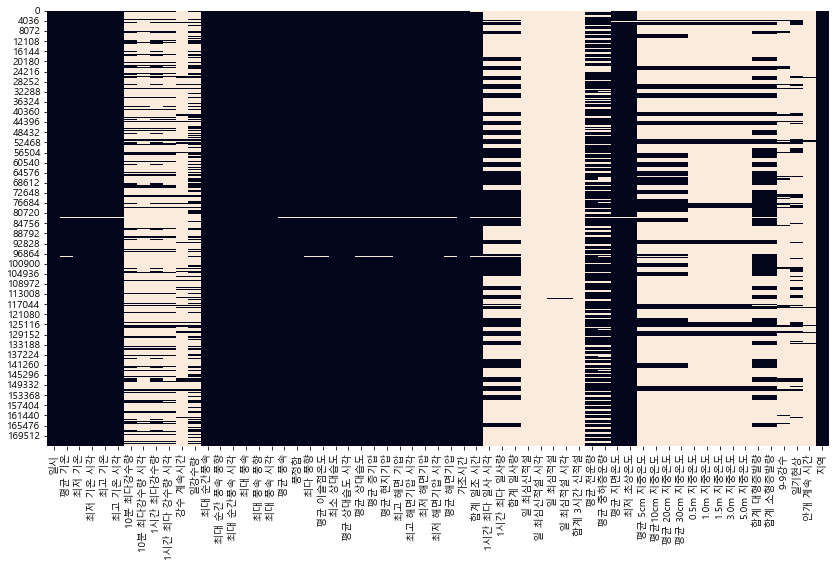

In [32]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

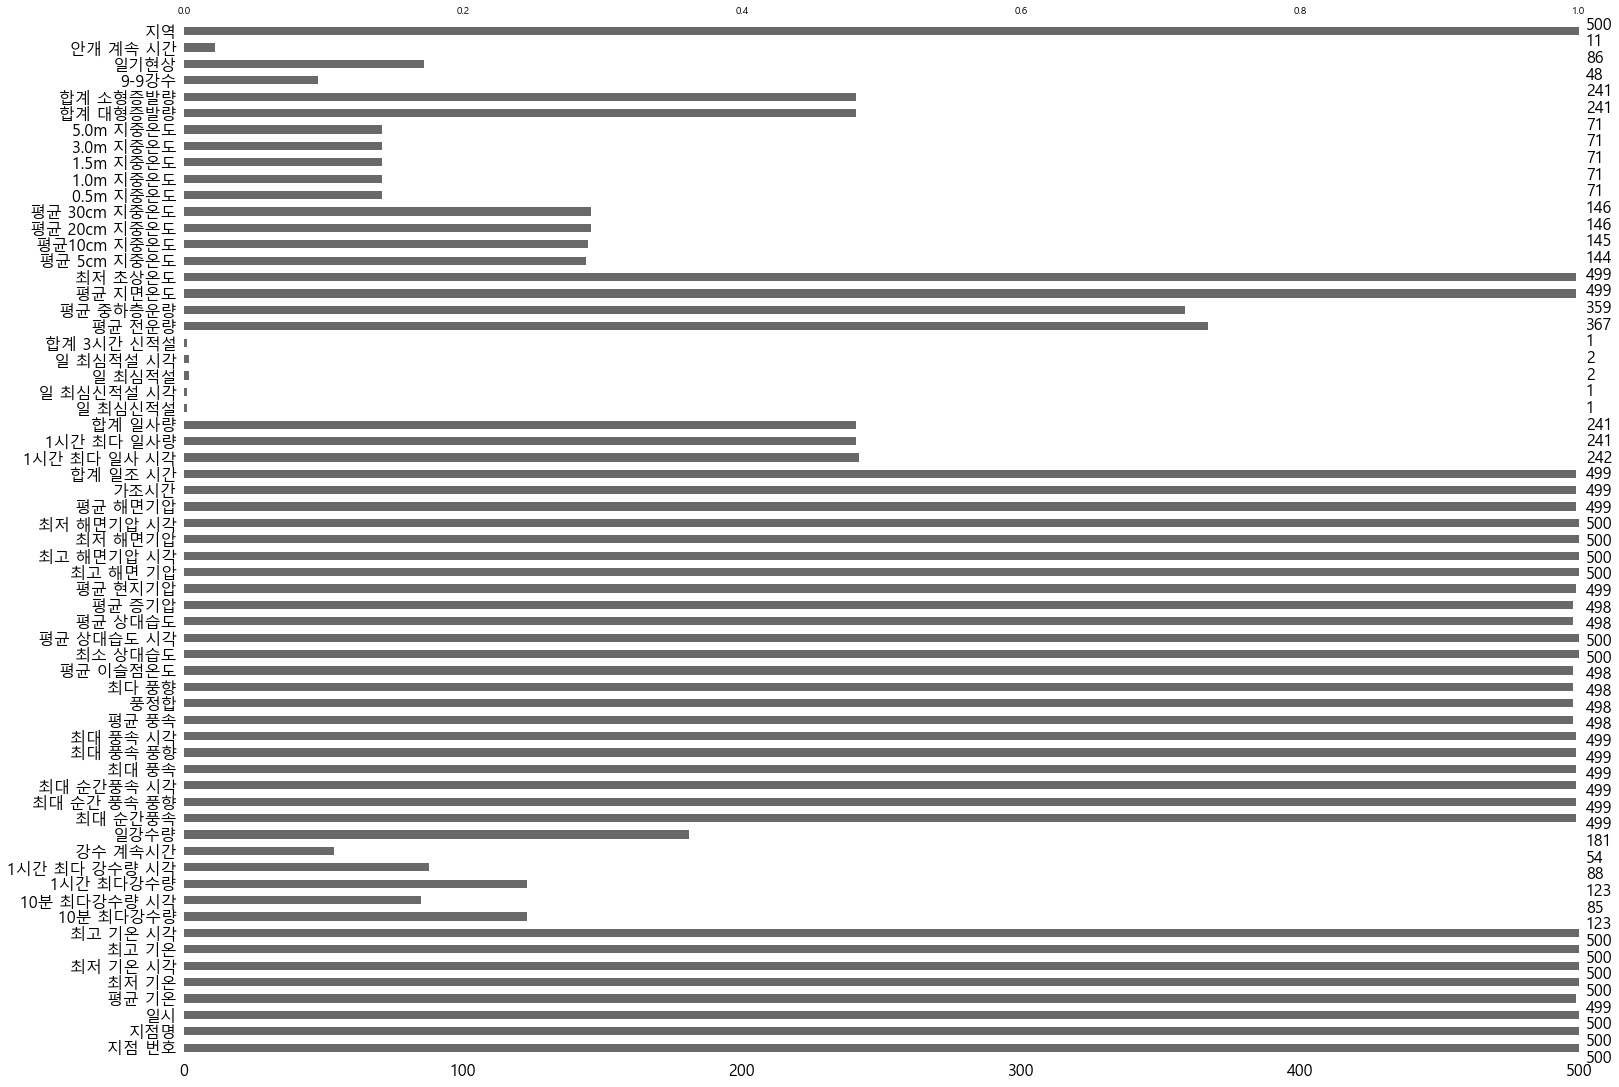

In [27]:
msno.bar(df.sample(500))

In [34]:
df.isnull().sum().sort_values().index

Index(['일시', '지역', '가조시간', '최저 기온 시각', '최고 기온 시각', '최고 기온', '최저 기온',
       '최저 해면기압 시각', '최고 해면기압 시각', '평균 상대습도 시각', '최소 상대습도', '최고 해면 기압',
       '평균 지면온도', '최저 해면기압', '최대 풍속 시각', '최대 순간풍속 시각', '최대 풍속 풍향', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 풍속', '최저 초상온도', '평균 풍속', '풍정합', '평균 기온', '평균 현지기압',
       '평균 해면기압', '합계 일조 시간', '평균 상대습도', '평균 이슬점온도', '평균 증기압', '최다 풍향',
       '평균 전운량', '평균 중하층운량', '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량',
       '합계 소형증발량', '합계 대형증발량', '일강수량', '평균 20cm 지중온도', '평균 30cm 지중온도',
       '평균 5cm 지중온도', '평균10cm 지중온도', '10분 최다강수량', '1시간 최다강수량', '1시간 최다 강수량 시각',
       '10분 최다강수량 시각', '일기현상', '1.0m 지중온도', '3.0m 지중온도', '1.5m 지중온도',
       '0.5m 지중온도', '5.0m 지중온도', '강수 계속시간', '9-9강수', '안개 계속 시간', '일 최심적설',
       '일 최심적설 시각', '일 최심신적설', '합계 3시간 신적설', '일 최심신적설 시각'],
      dtype='object')

In [36]:
df = df[['일시', '지역', '가조시간', '최저 기온 시각', '최고 기온 시각', '최고 기온', '최저 기온',
       '최저 해면기압 시각', '최고 해면기압 시각', '평균 상대습도 시각', '최소 상대습도', '최고 해면 기압',
       '평균 지면온도', '최저 해면기압', '최대 풍속 시각', '최대 순간풍속 시각', '최대 풍속 풍향', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 풍속', '최저 초상온도', '평균 풍속', '풍정합', '평균 기온', '평균 현지기압',
       '평균 해면기압', '합계 일조 시간', '평균 상대습도', '평균 이슬점온도', '평균 증기압', '최다 풍향',
       '평균 전운량', '평균 중하층운량', '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량',
       '합계 소형증발량', '합계 대형증발량', '일강수량', '평균 20cm 지중온도', '평균 30cm 지중온도',
       '평균 5cm 지중온도', '평균10cm 지중온도', '10분 최다강수량', '1시간 최다강수량', '1시간 최다 강수량 시각',
       '10분 최다강수량 시각', '일기현상', '1.0m 지중온도', '3.0m 지중온도', '1.5m 지중온도',
       '0.5m 지중온도', '5.0m 지중온도', '강수 계속시간', '9-9강수', '안개 계속 시간', '일 최심적설',
       '일 최심적설 시각', '일 최심신적설', '합계 3시간 신적설', '일 최심신적설 시각']]

<AxesSubplot:>

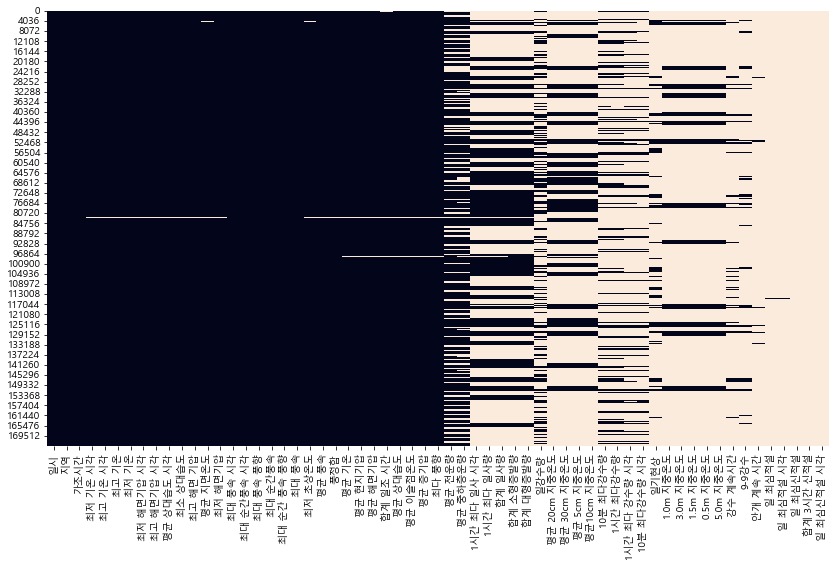

In [37]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cbar=False)

In [43]:
df.columns

Index(['일시', '지역', '가조시간', '최저 기온 시각', '최고 기온 시각', '최고 기온', '최저 기온',
       '최저 해면기압 시각', '최고 해면기압 시각', '평균 상대습도 시각', '최소 상대습도', '최고 해면 기압',
       '평균 지면온도', '최저 해면기압', '최대 풍속 시각', '최대 순간풍속 시각', '최대 풍속 풍향', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 풍속', '최저 초상온도', '평균 풍속', '풍정합', '평균 기온', '평균 현지기압',
       '평균 해면기압', '합계 일조 시간', '평균 상대습도', '평균 이슬점온도', '평균 증기압', '최다 풍향',
       '평균 전운량', '평균 중하층운량', '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량',
       '합계 소형증발량', '합계 대형증발량', '일강수량', '평균 20cm 지중온도', '평균 30cm 지중온도',
       '평균 5cm 지중온도', '평균10cm 지중온도', '10분 최다강수량', '1시간 최다강수량', '1시간 최다 강수량 시각',
       '10분 최다강수량 시각', '일기현상', '1.0m 지중온도', '3.0m 지중온도', '1.5m 지중온도',
       '0.5m 지중온도', '5.0m 지중온도', '강수 계속시간', '9-9강수', '안개 계속 시간', '일 최심적설',
       '일 최심적설 시각', '일 최심신적설', '합계 3시간 신적설', '일 최심신적설 시각'],
      dtype='object')

In [47]:
df = df.drop(['1.0m 지중온도', '3.0m 지중온도', '1.5m 지중온도','0.5m 지중온도', '5.0m 지중온도', '강수 계속시간', '9-9강수', '안개 계속 시간', '일 최심적설','일 최심적설 시각', '일 최심신적설', '합계 3시간 신적설', '일 최심신적설 시각'], axis=1)

<AxesSubplot:>

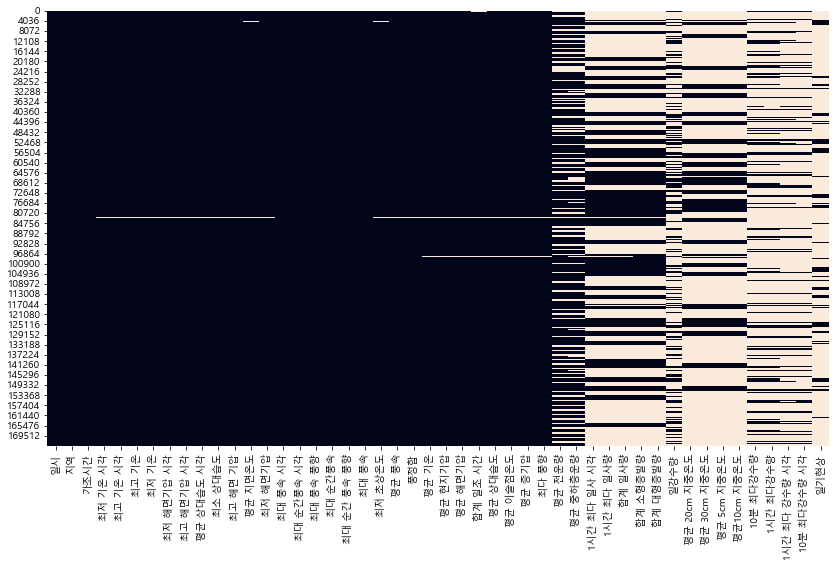

In [48]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cbar=False)

In [49]:
df.columns

Index(['일시', '지역', '가조시간', '최저 기온 시각', '최고 기온 시각', '최고 기온', '최저 기온',
       '최저 해면기압 시각', '최고 해면기압 시각', '평균 상대습도 시각', '최소 상대습도', '최고 해면 기압',
       '평균 지면온도', '최저 해면기압', '최대 풍속 시각', '최대 순간풍속 시각', '최대 풍속 풍향', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 풍속', '최저 초상온도', '평균 풍속', '풍정합', '평균 기온', '평균 현지기압',
       '평균 해면기압', '합계 일조 시간', '평균 상대습도', '평균 이슬점온도', '평균 증기압', '최다 풍향',
       '평균 전운량', '평균 중하층운량', '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량',
       '합계 소형증발량', '합계 대형증발량', '일강수량', '평균 20cm 지중온도', '평균 30cm 지중온도',
       '평균 5cm 지중온도', '평균10cm 지중온도', '10분 최다강수량', '1시간 최다강수량', '1시간 최다 강수량 시각',
       '10분 최다강수량 시각', '일기현상'],
      dtype='object')

In [50]:
df = df.drop(['평균 20cm 지중온도', '평균 30cm 지중온도','평균 5cm 지중온도', '평균10cm 지중온도', '10분 최다강수량', '1시간 최다강수량', '1시간 최다 강수량 시각','10분 최다강수량 시각'], axis=1)

<AxesSubplot:>

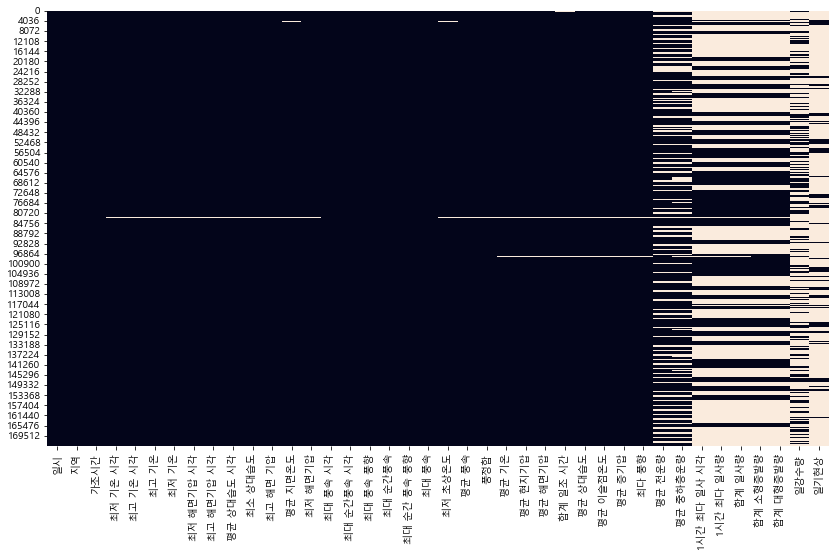

In [51]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cbar=False)

In [53]:
df[df['일기현상'].notnull()].head()

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,합계 소형증발량,합계 대형증발량,일강수량,일기현상
3652,2017-01-01,강원도,9.6,507.0,1352.0,5.8,-5.5,2353.0,1004.0,1352.0,...,320.0,8.0,8.0,1200.0,1.36,6.37,0.8,0.6,NaN,-{박무}-{박무}{강도0}0300-{시정(미만)}{1km}{안개}0530-{시정(...
3653,2017-01-02,강원도,9.6,2330.0,1537.0,8.6,-2.3,1429.0,1.0,1646.0,...,340.0,7.3,7.0,1200.0,0.93,4.17,0.8,0.5,0.0,-{박무}-{박무}{강도1}0300-{박무}{강도1}0600-{박무}{강도2}090...
3654,2017-01-03,강원도,9.6,712.0,1445.0,7.8,-6.2,1608.0,958.0,1516.0,...,20.0,2.5,2.5,1200.0,1.66,8.43,1.6,1.1,NaN,-{박무}-{박무}{강도2}0300-{시정(미만)}{1km}{안개}0450-{시정(...
3655,2017-01-04,강원도,9.6,733.0,1520.0,10.4,-5.0,1504.0,2330.0,1523.0,...,20.0,1.8,1.8,1200.0,1.64,9.18,1.5,1.0,NaN,{박무}0140-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}...
3658,2017-01-07,강원도,9.7,604.0,1543.0,8.3,-4.5,1710.0,913.0,1544.0,...,20.0,4.0,1.5,1300.0,1.63,7.68,1.2,0.8,NaN,{박무}0630-{박무}{강도1}0900-{시정(미만)}{1km}{안개}0930-{...


In [54]:
df.columns

Index(['일시', '지역', '가조시간', '최저 기온 시각', '최고 기온 시각', '최고 기온', '최저 기온',
       '최저 해면기압 시각', '최고 해면기압 시각', '평균 상대습도 시각', '최소 상대습도', '최고 해면 기압',
       '평균 지면온도', '최저 해면기압', '최대 풍속 시각', '최대 순간풍속 시각', '최대 풍속 풍향', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 풍속', '최저 초상온도', '평균 풍속', '풍정합', '평균 기온', '평균 현지기압',
       '평균 해면기압', '합계 일조 시간', '평균 상대습도', '평균 이슬점온도', '평균 증기압', '최다 풍향',
       '평균 전운량', '평균 중하층운량', '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량',
       '합계 소형증발량', '합계 대형증발량', '일강수량', '일기현상'],
      dtype='object')

In [55]:
df = df.drop(['일기현상'], axis=1)

In [63]:
df = df.drop(['합계 소형증발량', '합계 대형증발량'], axis=1)

<AxesSubplot:>

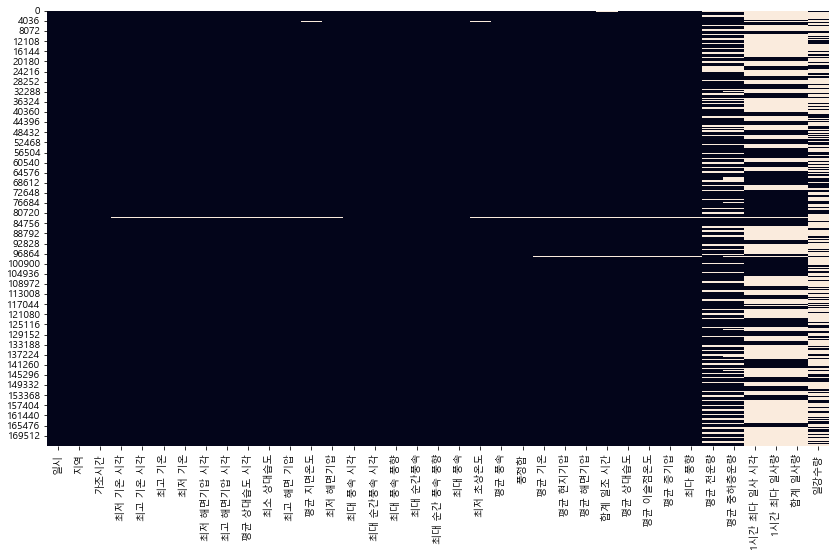

In [64]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

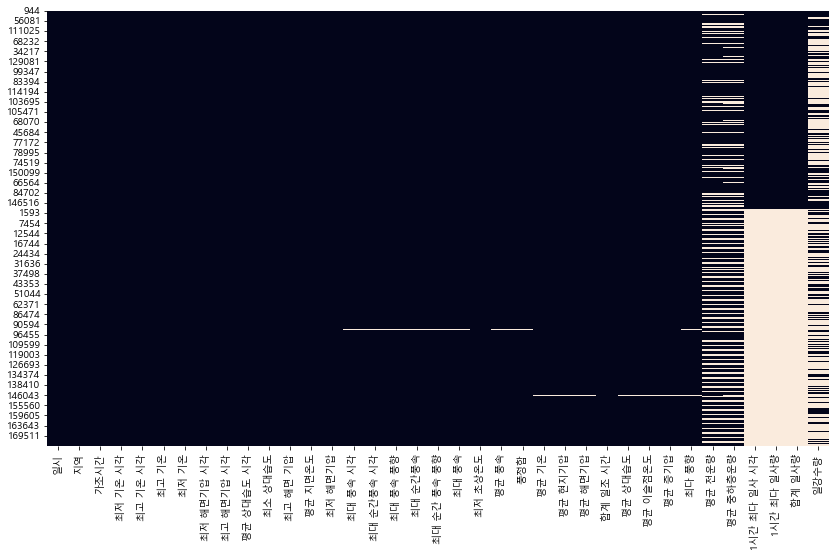

In [86]:
plt.figure(figsize=(14,8))
sns.heatmap(df.sort_values('1시간 최다 일사 시각').isnull(), cbar=False)

In [90]:
((df.isnull().sum()) / len(df) * 100).sort_values(ascending=False)

일강수량            63.006310
합계 일사량          54.439162
1시간 최다 일사량      54.436857
1시간 최다 일사 시각    54.402282
평균 중하층운량        27.276342
평균 전운량          25.232374
최다 풍향            0.274296
평균 증기압           0.196502
평균 상대습도          0.195926
평균 이슬점온도         0.195926
합계 일조 시간         0.185553
평균 해면기압          0.160774
평균 현지기압          0.157893
평균 기온            0.138301
풍정합              0.133114
평균 풍속            0.122166
최저 초상온도          0.110064
최대 풍속            0.097963
최대 순간 풍속 풍향      0.096810
최대 순간풍속          0.096234
최대 풍속 풍향         0.095082
최대 순간풍속 시각       0.094505
최대 풍속 시각         0.093353
최저 해면기압          0.086438
평균 지면온도          0.072032
최고 해면 기압         0.053015
최소 상대습도          0.048981
평균 상대습도 시각       0.044948
최고 해면기압 시각       0.043795
최저 해면기압 시각       0.042643
최저 기온            0.027084
최고 기온            0.026508
최고 기온 시각         0.024203
최저 기온 시각         0.024203
가조시간             0.020745
지역               0.000000
일시               0.000000
dtype: float64

In [68]:
len(df)

173535

In [61]:
len(df)/2

86767.5

In [65]:
df.isnull().sum()[(df.isnull().sum()) > (len(df)/2)]

1시간 최다 일사 시각     94407
1시간 최다 일사량       94467
합계 일사량           94471
일강수량            109338
dtype: int64

In [74]:
df[df['일강수량'].isnull()]

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 상대습도,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량
0,2017-01-01,강원도,9.6,639.0,1224.0,9.8,1.5,2354.0,1007.0,1115.0,...,50.0,-3.8,4.7,250.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,강원도,9.6,2243.0,1402.0,10.5,4.7,1421.0,1.0,2115.0,...,50.3,-1.6,5.5,270.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,강원도,9.6,701.0,1344.0,11.3,1.7,1504.0,707.0,1245.0,...,35.5,-8.4,3.3,290.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-04,강원도,9.6,2237.0,1114.0,9.8,1.7,37.0,2317.0,1302.0,...,46.4,-5.2,4.2,290.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-01-10,강원도,9.7,2339.0,3.0,6.2,-2.9,2.0,2359.0,2138.0,...,27.4,-16.8,1.7,290.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173530,2021-12-27,강원도,9.5,354.0,1352.0,-4.3,-15.4,1404.0,850.0,1207.0,...,67.1,-14.9,2.0,180.0,3.1,2.3,NaN,NaN,NaN,NaN
173531,2021-12-28,강원도,9.5,501.0,1507.0,1.8,-12.5,2331.0,751.0,1336.0,...,70.5,-9.1,3.2,180.0,3.8,2.5,NaN,NaN,NaN,NaN
173532,2021-12-29,강원도,9.6,440.0,1209.0,3.6,-5.5,1719.0,1.0,2140.0,...,73.1,-4.1,4.6,180.0,7.9,4.9,NaN,NaN,NaN,NaN
173533,2021-12-30,강원도,9.6,2359.0,1418.0,-0.5,-6.3,1.0,2330.0,1441.0,...,43.0,-14.7,2.0,180.0,2.5,0.8,NaN,NaN,NaN,NaN


In [73]:
df[df['일강수량'].notnull()]

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 상대습도,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량
4,2017-01-05,강원도,9.6,59.0,1101.0,4.0,1.3,1.0,2113.0,143.0,...,88.1,0.7,6.6,290.0,NaN,NaN,NaN,NaN,NaN,15.5
5,2017-01-06,강원도,9.6,2336.0,1358.0,9.2,1.6,2400.0,1.0,1443.0,...,80.9,1.3,6.7,270.0,NaN,NaN,NaN,NaN,NaN,0.0
6,2017-01-07,강원도,9.6,136.0,1315.0,11.3,0.8,1413.0,1.0,1206.0,...,65.5,0.2,6.3,290.0,NaN,NaN,NaN,NaN,NaN,0.5
7,2017-01-08,강원도,9.7,1955.0,44.0,6.6,4.0,2358.0,5.0,505.0,...,91.5,3.7,8.0,320.0,NaN,NaN,NaN,NaN,NaN,13.5
8,2017-01-09,강원도,9.7,2310.0,1352.0,9.4,2.0,431.0,2242.0,2357.0,...,49.4,-5.3,4.4,290.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173518,2021-12-15,강원도,9.6,2349.0,1543.0,7.9,1.2,532.0,2242.0,1516.0,...,89.4,2.5,7.4,180.0,6.4,4.9,NaN,NaN,NaN,2.1
173521,2021-12-18,강원도,9.5,732.0,2356.0,-2.6,-12.2,2331.0,241.0,1159.0,...,61.9,-13.1,2.4,180.0,4.8,2.9,NaN,NaN,NaN,0.6
173522,2021-12-19,강원도,9.5,841.0,1532.0,2.3,-9.4,31.0,838.0,1440.0,...,57.4,-8.8,3.2,180.0,2.1,2.1,NaN,NaN,NaN,0.9
173527,2021-12-24,강원도,9.5,142.0,1345.0,3.2,-3.3,1415.0,27.0,1101.0,...,84.3,-2.4,5.2,160.0,8.6,7.8,NaN,NaN,NaN,0.9


In [72]:
df['지역'].unique()

array(['강원도', '경기도', '충청북도', '인천시', '전라북도', '서울시', '경상북도', '전라남도', '경상남도',
       '충청남도', '제주도'], dtype=object)

In [71]:
df[df['일강수량'].notnull()]['지역'].unique()

array(['강원도', '경기도', '충청북도', '인천시', '전라북도', '서울시', '경상북도', '전라남도', '경상남도',
       '충청남도', '제주도'], dtype=object)

In [78]:
df[df['일강수량'] == 0.0]

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 상대습도,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량
5,2017-01-06,강원도,9.6,2336.0,1358.0,9.2,1.6,2400.0,1.0,1443.0,...,80.9,1.3,6.7,270.0,NaN,NaN,NaN,NaN,NaN,0.0
8,2017-01-09,강원도,9.7,2310.0,1352.0,9.4,2.0,431.0,2242.0,2357.0,...,49.4,-5.3,4.4,290.0,NaN,NaN,NaN,NaN,NaN,0.0
20,2017-01-21,강원도,10.0,530.0,1322.0,0.2,-8.9,2358.0,906.0,1016.0,...,66.6,-9.0,3.1,270.0,NaN,NaN,NaN,NaN,NaN,0.0
21,2017-01-22,강원도,10.0,2400.0,1415.0,-1.3,-9.4,37.0,2320.0,1426.0,...,46.6,-15.5,1.9,290.0,NaN,NaN,NaN,NaN,NaN,0.0
26,2017-01-27,강원도,10.1,2326.0,116.0,6.5,-2.6,115.0,2400.0,1400.0,...,35.4,-12.2,2.6,290.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173350,2021-06-30,강원도,14.8,125.0,1252.0,28.4,19.1,1450.0,954.0,1253.0,...,80.0,18.2,21.0,50.0,8.3,5.4,NaN,NaN,NaN,0.0
173355,2021-07-05,강원도,14.7,2359.0,1509.0,25.8,18.9,4.0,817.0,1308.0,...,81.9,18.4,21.2,200.0,9.4,6.4,NaN,NaN,NaN,0.0
173376,2021-07-26,강원도,14.3,525.0,1329.0,35.1,22.7,1520.0,1.0,1328.0,...,74.6,22.0,26.5,50.0,4.4,2.3,NaN,NaN,NaN,0.0
173381,2021-07-31,강원도,14.2,409.0,1708.0,34.1,23.7,1656.0,649.0,1516.0,...,75.1,23.1,28.2,340.0,6.1,2.6,NaN,NaN,NaN,0.0


In [80]:
df[(df['일강수량'] != 0.0) & df['일강수량'].notnull()]

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 상대습도,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량
4,2017-01-05,강원도,9.6,59.0,1101.0,4.0,1.3,1.0,2113.0,143.0,...,88.1,0.7,6.6,290.0,NaN,NaN,NaN,NaN,NaN,15.5
6,2017-01-07,강원도,9.6,136.0,1315.0,11.3,0.8,1413.0,1.0,1206.0,...,65.5,0.2,6.3,290.0,NaN,NaN,NaN,NaN,NaN,0.5
7,2017-01-08,강원도,9.7,1955.0,44.0,6.6,4.0,2358.0,5.0,505.0,...,91.5,3.7,8.0,320.0,NaN,NaN,NaN,NaN,NaN,13.5
19,2017-01-20,강원도,9.9,2358.0,341.0,1.3,-5.6,747.0,2339.0,800.0,...,83.0,-4.9,4.3,320.0,NaN,NaN,NaN,NaN,NaN,29.3
28,2017-01-29,강원도,10.2,1755.0,943.0,5.7,0.6,2338.0,1.0,234.0,...,73.3,-2.1,5.4,290.0,NaN,NaN,NaN,NaN,NaN,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173518,2021-12-15,강원도,9.6,2349.0,1543.0,7.9,1.2,532.0,2242.0,1516.0,...,89.4,2.5,7.4,180.0,6.4,4.9,NaN,NaN,NaN,2.1
173521,2021-12-18,강원도,9.5,732.0,2356.0,-2.6,-12.2,2331.0,241.0,1159.0,...,61.9,-13.1,2.4,180.0,4.8,2.9,NaN,NaN,NaN,0.6
173522,2021-12-19,강원도,9.5,841.0,1532.0,2.3,-9.4,31.0,838.0,1440.0,...,57.4,-8.8,3.2,180.0,2.1,2.1,NaN,NaN,NaN,0.9
173527,2021-12-24,강원도,9.5,142.0,1345.0,3.2,-3.3,1415.0,27.0,1101.0,...,84.3,-2.4,5.2,160.0,8.6,7.8,NaN,NaN,NaN,0.9


In [81]:
df.loc[76684, :]

일시              2021-10-20
지역                    경상남도
가조시간                  11.2
최저 기온 시각             649.0
최고 기온 시각            1504.0
최고 기온                 19.2
최저 기온                  6.3
최저 해면기압 시각          1504.0
최고 해면기압 시각           940.0
평균 상대습도 시각          1500.0
최소 상대습도               35.0
최고 해면 기압            1022.2
평균 지면온도               13.1
최저 해면기압             1018.3
최대 풍속 시각            1544.0
최대 순간풍속 시각          1408.0
최대 풍속 풍향             250.0
최대 순간풍속                5.9
최대 순간 풍속 풍향          270.0
최대 풍속                  3.0
최저 초상온도                3.8
평균 풍속                  1.5
풍정합                 1298.0
평균 기온                 12.8
평균 현지기압             1019.4
평균 해면기압             1020.2
합계 일조 시간               8.7
평균 상대습도               66.9
평균 이슬점온도               6.2
평균 증기압                 9.5
최다 풍향                250.0
평균 전운량                 5.9
평균 중하층운량               2.1
1시간 최다 일사 시각        1200.0
1시간 최다 일사량            2.69
합계 일사량               16.79
일강수량                   NaN
N

In [82]:
df.sort_values(['일시', '지역'])

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 상대습도,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량
0,2017-01-01,강원도,9.6,639.0,1224.0,9.8,1.5,2354.0,1007.0,1115.0,...,50.0,-3.8,4.7,250.0,NaN,NaN,NaN,NaN,NaN,NaN
1826,2017-01-01,강원도,9.6,844.0,1529.0,5.5,-3.9,2346.0,1007.0,1449.0,...,85.0,-1.9,5.3,20.0,NaN,NaN,NaN,NaN,NaN,NaN
3652,2017-01-01,강원도,9.6,507.0,1352.0,5.8,-5.5,2353.0,1004.0,1352.0,...,87.1,-2.3,5.2,320.0,8.0,8.0,1200.0,1.36,6.37,NaN
5478,2017-01-01,강원도,9.7,821.0,1445.0,5.9,-4.6,1442.0,213.0,1443.0,...,63.6,-6.2,3.9,230.0,NaN,NaN,NaN,NaN,NaN,NaN
7304,2017-01-01,강원도,9.6,735.0,1443.0,6.1,-6.2,2333.0,932.0,1338.0,...,83.8,-2.7,5.1,50.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36585,2021-12-31,충청북도,9.7,744.0,1408.0,-0.8,-8.6,13.0,2350.0,1316.0,...,51.1,-13.8,2.1,320.0,0.1,0.1,NaN,NaN,NaN,NaN
63974,2021-12-31,충청북도,9.7,2320.0,1433.0,-1.9,-11.4,1.0,2327.0,1333.0,...,38.4,-18.7,1.4,270.0,0.0,0.0,1200.0,1.92,10.53,NaN
74930,2021-12-31,충청북도,9.7,2340.0,1415.0,-0.9,-6.2,1.0,1006.0,1343.0,...,38.8,-16.6,1.7,270.0,0.0,0.0,1200.0,1.94,11.10,NaN
78582,2021-12-31,충청북도,9.7,605.0,1434.0,0.5,-8.3,1.0,2349.0,1411.0,...,51.6,-13.8,2.1,320.0,0.0,0.0,1200.0,1.99,11.56,0.0


In [84]:
df[(df['일시'] == '2017-01-01') & (df['지역'] == '강원도')]

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 상대습도,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량
0,2017-01-01,강원도,9.6,639.0,1224.0,9.8,1.5,2354.0,1007.0,1115.0,...,50.0,-3.8,4.7,250.0,NaN,NaN,NaN,NaN,NaN,NaN
1826,2017-01-01,강원도,9.6,844.0,1529.0,5.5,-3.9,2346.0,1007.0,1449.0,...,85.0,-1.9,5.3,20.0,NaN,NaN,NaN,NaN,NaN,NaN
3652,2017-01-01,강원도,9.6,507.0,1352.0,5.8,-5.5,2353.0,1004.0,1352.0,...,87.1,-2.3,5.2,320.0,8.0,8.0,1200.0,1.36,6.37,NaN
5478,2017-01-01,강원도,9.7,821.0,1445.0,5.9,-4.6,1442.0,213.0,1443.0,...,63.6,-6.2,3.9,230.0,NaN,NaN,NaN,NaN,NaN,NaN
7304,2017-01-01,강원도,9.6,735.0,1443.0,6.1,-6.2,2333.0,932.0,1338.0,...,83.8,-2.7,5.1,50.0,NaN,NaN,NaN,NaN,NaN,NaN
9130,2017-01-01,강원도,9.6,706.0,1427.0,5.6,-5.4,2357.0,930.0,1428.0,...,80.4,-4.0,4.6,140.0,NaN,NaN,NaN,NaN,NaN,NaN
18260,2017-01-01,강원도,9.6,437.0,1520.0,1.8,-4.6,2343.0,437.0,1127.0,...,74.3,-5.3,4.1,270.0,NaN,NaN,1300.0,1.58,9.80,NaN
21912,2017-01-01,강원도,9.6,441.0,1449.0,3.2,-4.6,2358.0,948.0,1402.0,...,93.3,-1.4,5.5,360.0,NaN,NaN,1300.0,1.13,4.07,NaN
29216,2017-01-01,강원도,9.6,408.0,1409.0,9.5,0.8,2339.0,1012.0,1105.0,...,50.3,-3.9,4.6,160.0,4.6,0.0,1100.0,1.44,6.94,NaN
32868,2017-01-01,강원도,9.6,120.0,1422.0,9.2,4.0,2326.0,1031.0,1106.0,...,39.4,-6.3,3.8,290.0,NaN,NaN,1100.0,1.67,8.81,NaN


In [95]:
df.groupby('지역')['일강수량'].describe()

,count,mean,std,min,25%,50%,75%,max
지역,,,,,,,,
강원도,9560.0,9.301192,20.302696,0.0,0.1,1.60,9.000,384.3
경기도,3181.0,9.506036,19.057541,0.0,0.2,1.80,9.500,279.6
경상남도,9726.0,12.348057,25.251365,0.0,0.1,2.15,13.000,308.0
경상북도,9691.0,9.029151,17.769055,0.0,0.1,1.60,10.400,332.9
서울시,722.0,8.651247,18.535717,0.0,0.0,1.20,7.475,144.5
인천시,2037.0,7.372459,16.801645,0.0,0.0,0.70,6.000,216.5
전라남도,9687.0,9.845917,22.190765,0.0,0.1,1.40,9.100,305.0
전라북도,7336.0,9.039149,19.006388,0.0,0.1,1.60,9.300,361.3
제주도,3146.0,11.057216,25.566031,0.0,0.0,1.40,9.800,310.0


In [101]:
df[df['지역'] == '강원도']['일강수량']

0          NaN
1          NaN
2          NaN
3          NaN
4         15.5
          ... 
173530     NaN
173531     NaN
173532     NaN
173533     NaN
173534     NaN
Name: 일강수량, Length: 25564, dtype: float64

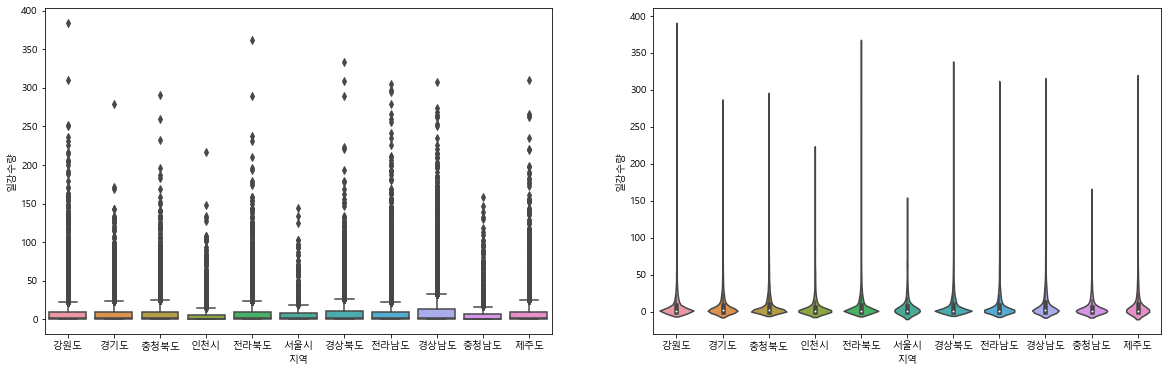

In [121]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(x='지역', y='일강수량', data=df)

plt.subplot(1,2,2)
sns.violinplot(x='지역', y='일강수량', data=df)
plt.show()

In [131]:
df[df['지역'] == '강원도']['일강수량'].describe()

count    9560.000000
mean        9.301192
std        20.302696
min         0.000000
25%         0.100000
50%         1.600000
75%         9.000000
max       384.300000
Name: 일강수량, dtype: float64

In [137]:
df['지역'].unique()

array(['강원도', '경기도', '충청북도', '인천시', '전라북도', '서울시', '경상북도', '전라남도', '경상남도',
       '충청남도', '제주도'], dtype=object)

In [146]:
area_ls = ['강원도', '경기도', '충청북도', '인천시', '전라북도', '서울시', '경상북도', '전라남도', '경상남도','충청남도', '제주도']

In [164]:
print('<지역별 이상치 비율>')
for area in area_ls:
    des75 = df[df['지역'] == area]['일강수량'].describe()[-2]
    a = len(df[(df['지역'] == area) & (df['일강수량'].notnull()) & (df['일강수량'] > des75)])
    b = len(df[(df['지역'] == area) & (df['일강수량'].notnull())])
    print(area, a/b*100)

<지역별 이상치 비율>
강원도 24.864016736401673
경기도 24.992140836215025
충청북도 24.933932346723044
인천시 24.889543446244478
전라북도 24.972737186477644
서울시 25.069252077562325
경상북도 24.93034774533072
전라남도 24.992257664911737
경상남도 24.706971005552127
충청남도 24.88658457550227
제주도 24.920534011443102


In [162]:
print('<지역별 비 안 온날 비율>')
for area in area_ls:
    a = len(df[(df['지역'] == area) & (df['일강수량'].notnull()) & (df['일강수량'] == 0.0)])
    b = len(df[(df['지역'] == area) & (df['일강수량'].notnull())])
    print(area, a/b*100)

<지역별 비 안 온날 비율>
강원도 23.65062761506276
경기도 17.730273498899717
충청북도 21.128435517970402
인천시 29.995090819833088
전라북도 20.229007633587788
서울시 27.008310249307478
경상북도 22.195851821277472
전라남도 24.279962836791576
경상남도 20.758790869833437
충청남도 31.17303953337654
제주도 25.047679593134138


In [166]:
# 비 온날 기록의 비율이 압도적으로 많음
print('<지역별 이상치 아닌 비 온날 비율>')
for area in area_ls:
    des75 = df[df['지역'] == area]['일강수량'].describe()[-2]
    a = len(df[(df['지역'] == area) & (df['일강수량'].notnull()) & (df['일강수량'] != 0.0) & (df['일강수량'] <= des75)])
    b = len(df[(df['지역'] == area) & (df['일강수량'].notnull())])
    print(area, a/b*100)

<지역별 이상치 아닌 비 온날 비율>
강원도 51.48535564853557
경기도 57.27758566488526
충청북도 53.93763213530656
인천시 45.11536573392244
전라북도 54.79825517993457
서울시 47.92243767313019
경상북도 52.87380043339181
전라남도 50.72777949829669
경상남도 54.53423812461443
충청남도 43.94037589112119
제주도 50.03178639542276


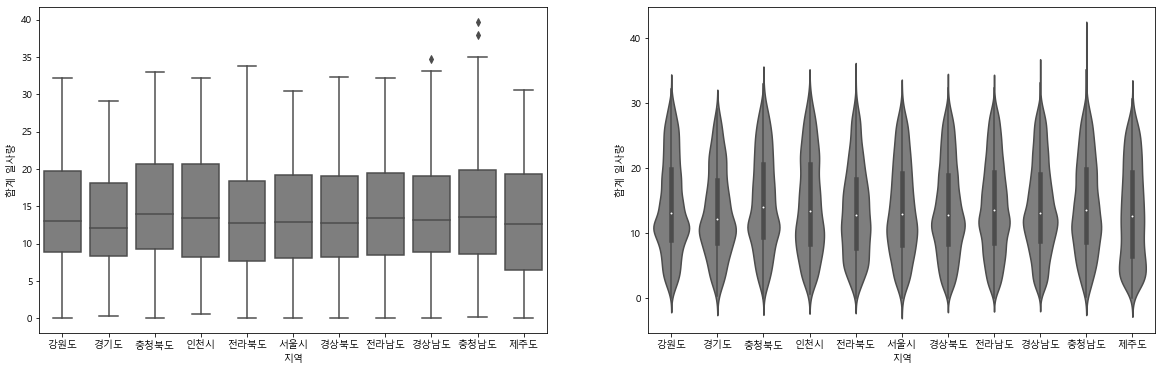

In [176]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(x='지역', y='합계 일사량', data=df, color='#7e7e7e')

plt.subplot(1,2,2)
sns.violinplot(x='지역', y='합계 일사량', data=df, color='#7e7e7e')
plt.show()

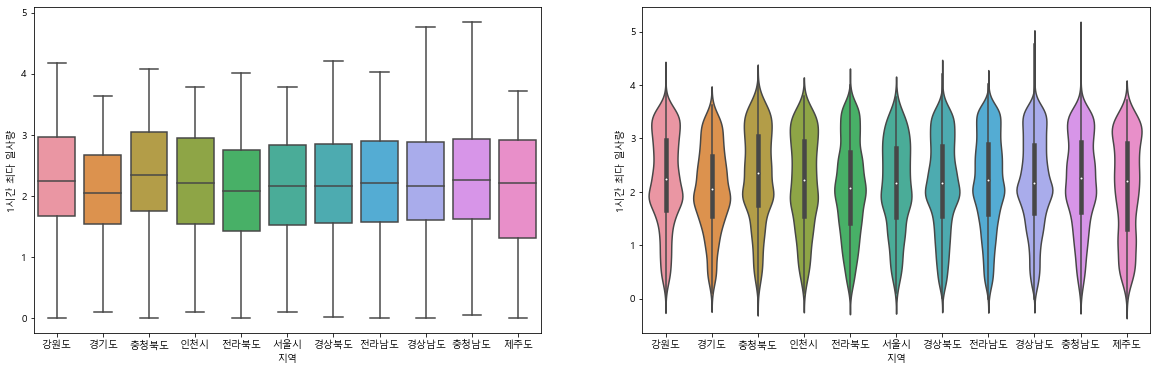

In [123]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(x='지역', y='1시간 최다 일사량', data=df)

plt.subplot(1,2,2)
sns.violinplot(x='지역', y='1시간 최다 일사량', data=df)
plt.show()

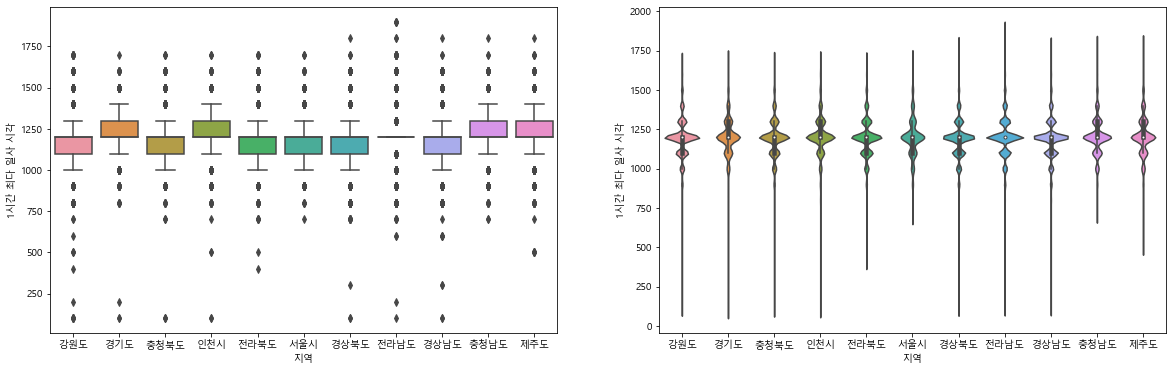

In [124]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(x='지역', y='1시간 최다 일사 시각', data=df)

plt.subplot(1,2,2)
sns.violinplot(x='지역', y='1시간 최다 일사 시각', data=df)
plt.show()

In [180]:
df[df['1시간 최다 일사 시각'].notnull()]

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 상대습도,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량
944,2019-08-03,강원도,14.1,317.0,1602.0,29.7,24.4,1754.0,825.0,1600.0,...,87.1,24.3,30.4,20.0,5.3,1.1,100.0,NaN,NaN,NaN
3652,2017-01-01,강원도,9.6,507.0,1352.0,5.8,-5.5,2353.0,1004.0,1352.0,...,87.1,-2.3,5.2,320.0,8.0,8.0,1200.0,1.36,6.37,NaN
3653,2017-01-02,강원도,9.6,2330.0,1537.0,8.6,-2.3,1429.0,1.0,1646.0,...,86.5,0.1,6.2,340.0,7.3,7.0,1200.0,0.93,4.17,0.0
3654,2017-01-03,강원도,9.6,712.0,1445.0,7.8,-6.2,1608.0,958.0,1516.0,...,74.9,-4.8,4.3,20.0,2.5,2.5,1200.0,1.66,8.43,NaN
3655,2017-01-04,강원도,9.6,733.0,1520.0,10.4,-5.0,1504.0,2330.0,1523.0,...,75.0,-3.7,4.7,20.0,1.8,1.8,1200.0,1.64,9.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167361,2020-02-05,인천시,10.4,2350.0,1520.0,-4.7,-11.5,4.0,2144.0,1207.0,...,43.6,-18.8,1.4,NaN,0.6,0.0,700.0,NaN,NaN,NaN
167458,2020-05-12,인천시,14.1,339.0,1633.0,18.9,8.2,1425.0,2353.0,1626.0,...,74.6,8.8,11.5,NaN,4.1,3.4,500.0,NaN,NaN,0.0
167459,2020-05-13,인천시,14.2,547.0,1419.0,19.3,7.8,113.0,2142.0,1403.0,...,66.8,7.7,10.5,NaN,0.6,0.0,500.0,NaN,NaN,NaN
168965,2019-06-28,경기도,14.7,608.0,1405.0,30.3,23.1,1504.0,750.0,1406.0,...,71.0,19.9,23.3,320.0,8.6,NaN,100.0,NaN,NaN,NaN


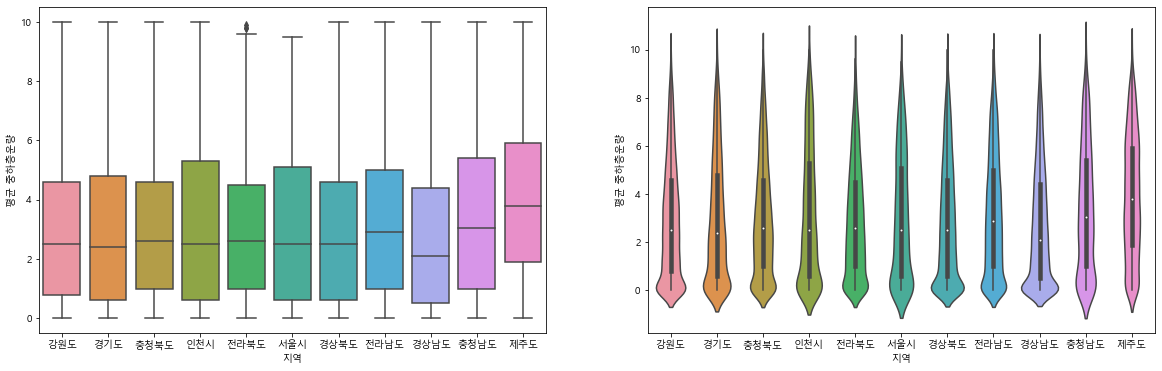

In [127]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(x='지역', y='평균 중하층운량', data=df)

plt.subplot(1,2,2)
sns.violinplot(x='지역', y='평균 중하층운량', data=df)
plt.show()

C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


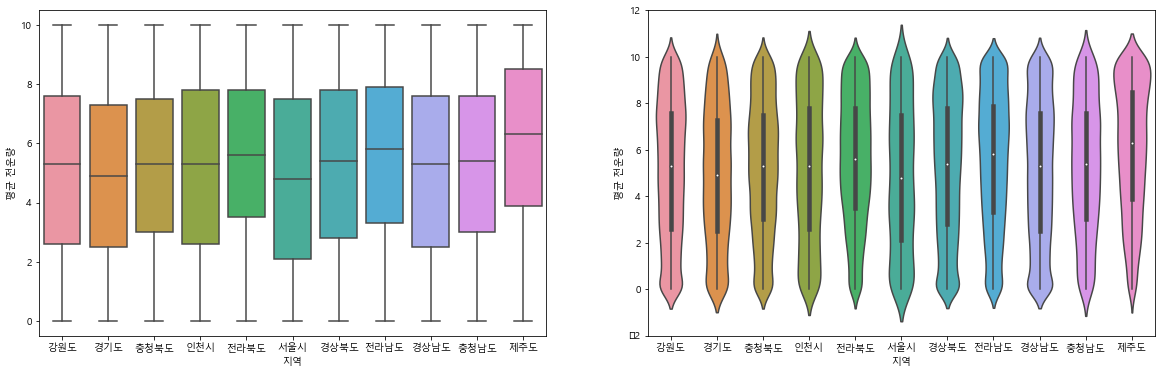

In [128]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(x='지역', y='평균 전운량', data=df)

plt.subplot(1,2,2)
sns.violinplot(x='지역', y='평균 전운량', data=df)
plt.show()

In [ ]:
'''
일강수량            63.006310
합계 일사량          54.439162
1시간 최다 일사량      54.436857
1시간 최다 일사 시각    54.402282
평균 중하층운량        27.276342
평균 전운량          25.232374

여기서 지역별 월별로 나눠서 더 세세하게 평균값을 넣을 수 있겠지만 시간이 부족하니까
일단 지역별로 평균값을 넣어서 결측치를 처리할 예정

일 강수량은 이상치가 많아서 제외
어쩌면 월별로 나눠서 보면 이상치가 줄어들지도 모르는 일이긴 함
'''

In [179]:
df.groupby('지역')['합계 일사량'].mean()

지역
강원도     14.259285
경기도     13.236103
경상남도    13.980226
경상북도    13.708905
서울시     13.721946
인천시     14.393101
전라남도    14.073313
전라북도    13.385990
제주도     13.184194
충청남도    14.236009
충청북도    14.860763
Name: 합계 일사량, dtype: float64

In [184]:
fill_mean_func = lambda g: g.fillna(g.mean())
df['tmp'] = df.groupby('지역')['합계 일사량'].apply(fill_mean_func)

In [187]:
df[['지역', '합계 일사량', 'tmp']][df[['지역', '합계 일사량', 'tmp']]['지역'] == '강원도']

,지역,합계 일사량,tmp
0,강원도,NaN,14.259285
1,강원도,NaN,14.259285
2,강원도,NaN,14.259285
3,강원도,NaN,14.259285
4,강원도,NaN,14.259285
...,...,...,...
173530,강원도,NaN,14.259285
173531,강원도,NaN,14.259285
173532,강원도,NaN,14.259285
173533,강원도,NaN,14.259285


In [188]:
df[['지역', '합계 일사량', 'tmp']][df[['지역', '합계 일사량', 'tmp']]['지역'] == '경기도']

,지역,합계 일사량,tmp
10956,경기도,NaN,13.236103
10957,경기도,NaN,13.236103
10958,경기도,NaN,13.236103
10959,경기도,NaN,13.236103
10960,경기도,NaN,13.236103
...,...,...,...
171704,경기도,NaN,13.236103
171705,경기도,NaN,13.236103
171706,경기도,NaN,13.236103
171707,경기도,NaN,13.236103


In [190]:
df[df['합계 일사량'].notnull()].head()

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량,tmp
3652,2017-01-01,강원도,9.6,507.0,1352.0,5.8,-5.5,2353.0,1004.0,1352.0,...,-2.3,5.2,320.0,8.0,8.0,1200.0,1.36,6.37,NaN,6.37
3653,2017-01-02,강원도,9.6,2330.0,1537.0,8.6,-2.3,1429.0,1.0,1646.0,...,0.1,6.2,340.0,7.3,7.0,1200.0,0.93,4.17,0.0,4.17
3654,2017-01-03,강원도,9.6,712.0,1445.0,7.8,-6.2,1608.0,958.0,1516.0,...,-4.8,4.3,20.0,2.5,2.5,1200.0,1.66,8.43,NaN,8.43
3655,2017-01-04,강원도,9.6,733.0,1520.0,10.4,-5.0,1504.0,2330.0,1523.0,...,-3.7,4.7,20.0,1.8,1.8,1200.0,1.64,9.18,NaN,9.18
3656,2017-01-05,강원도,9.7,545.0,1440.0,8.5,-5.4,1.0,2041.0,1414.0,...,-3.2,4.9,50.0,7.1,3.8,1300.0,0.93,5.70,NaN,5.70


In [191]:
df[df['합계 일사량'].isnull()].head()

,일시,지역,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,최저 기온,최저 해면기압 시각,최고 해면기압 시각,평균 상대습도 시각,...,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량,tmp
0,2017-01-01,강원도,9.6,639.0,1224.0,9.8,1.5,2354.0,1007.0,1115.0,...,-3.8,4.7,250.0,NaN,NaN,NaN,NaN,NaN,NaN,14.259285
1,2017-01-02,강원도,9.6,2243.0,1402.0,10.5,4.7,1421.0,1.0,2115.0,...,-1.6,5.5,270.0,NaN,NaN,NaN,NaN,NaN,NaN,14.259285
2,2017-01-03,강원도,9.6,701.0,1344.0,11.3,1.7,1504.0,707.0,1245.0,...,-8.4,3.3,290.0,NaN,NaN,NaN,NaN,NaN,NaN,14.259285
3,2017-01-04,강원도,9.6,2237.0,1114.0,9.8,1.7,37.0,2317.0,1302.0,...,-5.2,4.2,290.0,NaN,NaN,NaN,NaN,NaN,NaN,14.259285
4,2017-01-05,강원도,9.6,59.0,1101.0,4.0,1.3,1.0,2113.0,143.0,...,0.7,6.6,290.0,NaN,NaN,NaN,NaN,NaN,15.5,14.259285


In [192]:
tmp_ls = ['합계 일사량', '1시간 최다 일사량', '1시간 최다 일사 시각', '평균 중하층운량', '평균 전운량']
for tmp in tmp_ls:
    fill_mean_func = lambda g: g.fillna(g.mean())
    df[tmp] = df.groupby('지역')[tmp].apply(fill_mean_func)

In [193]:
df.isnull().sum()

일시                   0
지역                   0
가조시간                36
최저 기온 시각            42
최고 기온 시각            42
최고 기온               46
최저 기온               47
최저 해면기압 시각          74
최고 해면기압 시각          76
평균 상대습도 시각          78
최소 상대습도             85
최고 해면 기압            92
평균 지면온도            125
최저 해면기압            150
최대 풍속 시각           162
최대 순간풍속 시각         164
최대 풍속 풍향           165
최대 순간풍속            167
최대 순간 풍속 풍향        168
최대 풍속              170
최저 초상온도            191
평균 풍속              212
풍정합                231
평균 기온              240
평균 현지기압            274
평균 해면기압            279
합계 일조 시간           322
평균 상대습도            340
평균 이슬점온도           340
평균 증기압             341
최다 풍향              476
평균 전운량               0
평균 중하층운량             0
1시간 최다 일사 시각         0
1시간 최다 일사량           0
합계 일사량               0
일강수량            109338
tmp                  0
dtype: int64

<AxesSubplot:>

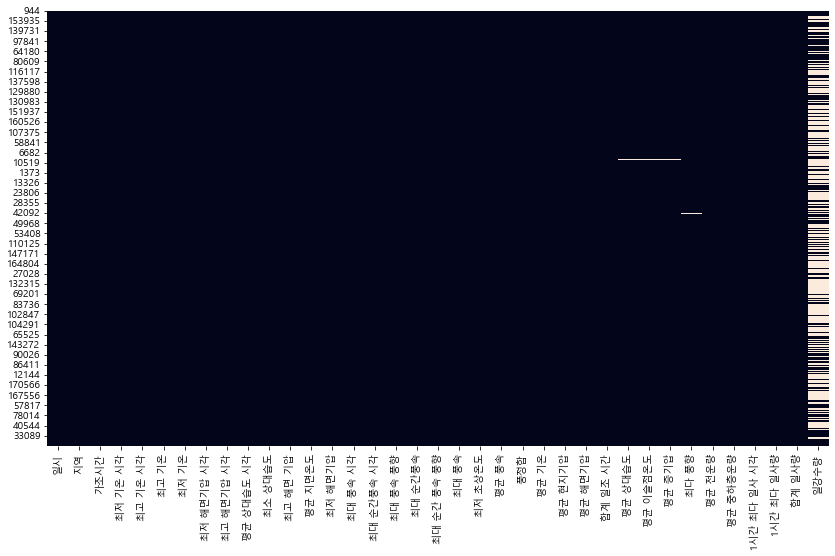

In [197]:
plt.figure(figsize=(14,8))
sns.heatmap(df.sort_values('1시간 최다 일사 시각').isnull(), cbar=False)

In [198]:
df.columns

Index(['일시', '지역', '가조시간', '최저 기온 시각', '최고 기온 시각', '최고 기온', '최저 기온',
       '최저 해면기압 시각', '최고 해면기압 시각', '평균 상대습도 시각', '최소 상대습도', '최고 해면 기압',
       '평균 지면온도', '최저 해면기압', '최대 풍속 시각', '최대 순간풍속 시각', '최대 풍속 풍향', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 풍속', '최저 초상온도', '평균 풍속', '풍정합', '평균 기온', '평균 현지기압',
       '평균 해면기압', '합계 일조 시간', '평균 상대습도', '평균 이슬점온도', '평균 증기압', '최다 풍향',
       '평균 전운량', '평균 중하층운량', '1시간 최다 일사 시각', '1시간 최다 일사량', '합계 일사량', '일강수량'],
      dtype='object')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173535 entries, 0 to 173534
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일시            173535 non-null  object 
 1   지역            173535 non-null  object 
 2   가조시간          173499 non-null  float64
 3   최저 기온 시각      173493 non-null  float64
 4   최고 기온 시각      173493 non-null  float64
 5   최고 기온         173489 non-null  float64
 6   최저 기온         173488 non-null  float64
 7   최저 해면기압 시각    173461 non-null  float64
 8   최고 해면기압 시각    173459 non-null  float64
 9   평균 상대습도 시각    173457 non-null  float64
 10  최소 상대습도       173450 non-null  float64
 11  최고 해면 기압      173443 non-null  float64
 12  평균 지면온도       173410 non-null  float64
 13  최저 해면기압       173385 non-null  float64
 14  최대 풍속 시각      173373 non-null  float64
 15  최대 순간풍속 시각    173371 non-null  float64
 16  최대 풍속 풍향      173370 non-null  float64
 17  최대 순간풍속       173368 non-null  float64
 18  최대 순

In [200]:
tmp_ls = ['가조시간', '최저 기온 시각', '최고 기온 시각', '최고 기온', '최저 기온',
       '최저 해면기압 시각', '최고 해면기압 시각', '평균 상대습도 시각', '최소 상대습도', '최고 해면 기압',
       '평균 지면온도', '최저 해면기압', '최대 풍속 시각', '최대 순간풍속 시각', '최대 풍속 풍향', '최대 순간풍속',
       '최대 순간 풍속 풍향', '최대 풍속', '최저 초상온도', '평균 풍속', '풍정합', '평균 기온', '평균 현지기압',
       '평균 해면기압', '합계 일조 시간', '평균 상대습도', '평균 이슬점온도', '평균 증기압', '최다 풍향']
for tmp in tmp_ls:
    fill_mean_func = lambda g: g.fillna(g.mean())
    df[tmp] = df.groupby('지역')[tmp].apply(fill_mean_func)

In [201]:
df.isnull().sum()

일시                   0
지역                   0
가조시간                 0
최저 기온 시각             0
최고 기온 시각             0
최고 기온                0
최저 기온                0
최저 해면기압 시각           0
최고 해면기압 시각           0
평균 상대습도 시각           0
최소 상대습도              0
최고 해면 기압             0
평균 지면온도              0
최저 해면기압              0
최대 풍속 시각             0
최대 순간풍속 시각           0
최대 풍속 풍향             0
최대 순간풍속              0
최대 순간 풍속 풍향          0
최대 풍속                0
최저 초상온도              0
평균 풍속                0
풍정합                  0
평균 기온                0
평균 현지기압              0
평균 해면기압              0
합계 일조 시간             0
평균 상대습도              0
평균 이슬점온도             0
평균 증기압               0
최다 풍향                0
평균 전운량               0
평균 중하층운량             0
1시간 최다 일사 시각         0
1시간 최다 일사량           0
합계 일사량               0
일강수량            109338
dtype: int64

C:\Users\user\.conda\envs\han\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


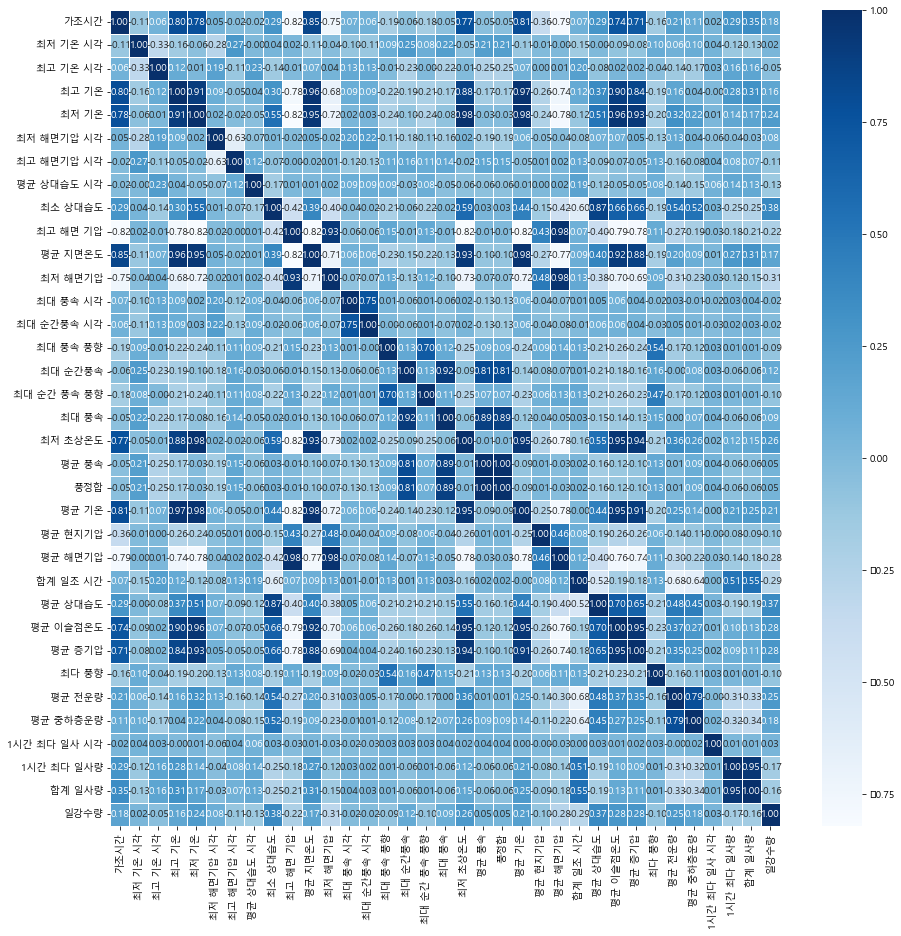

In [202]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), 
            annot=True, 
            fmt = '.2f', 
            linewidths=.5, 
            cmap='Blues')
plt.show()

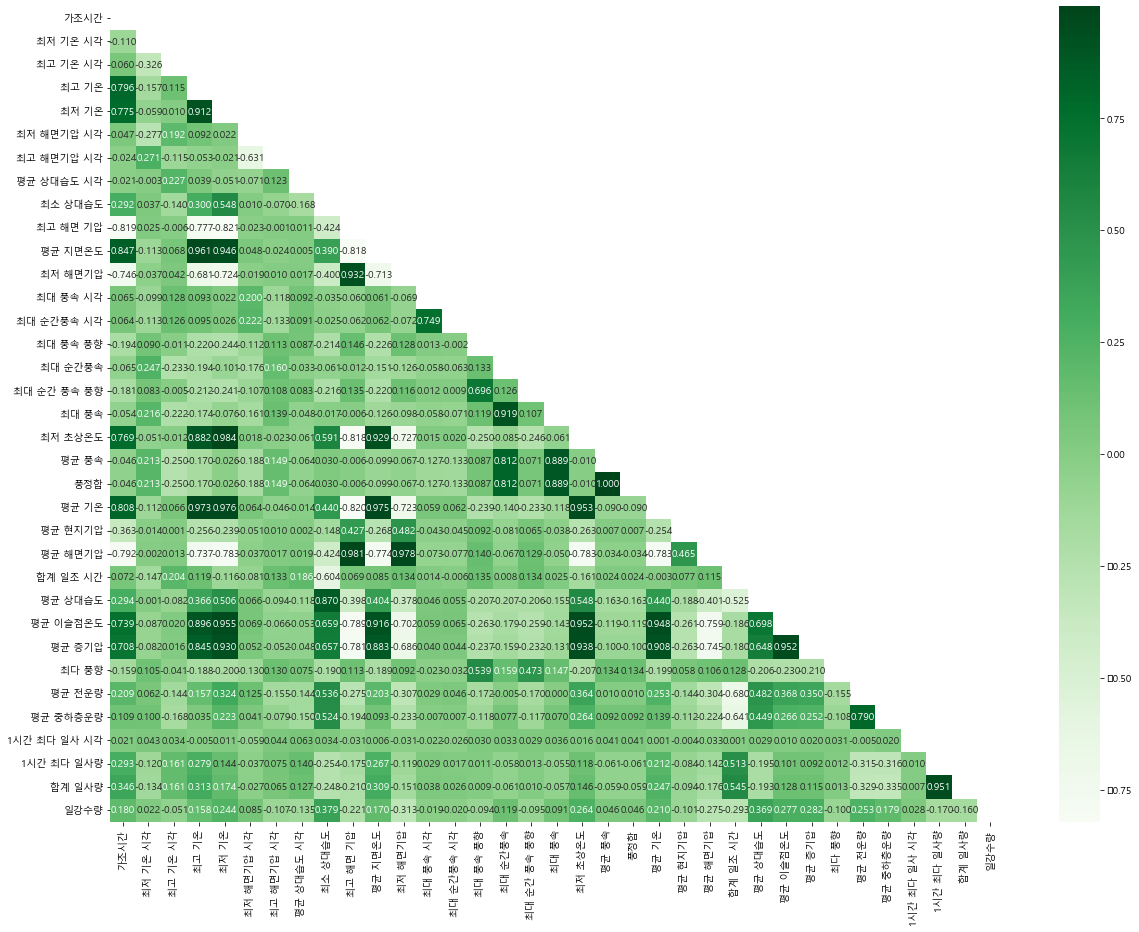

In [210]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
#plt.rcParams["figure.figsize"] = (20,15) # 그림 크기 조정
sns.heatmap(data = df.corr(), mask=mask, annot=True, fmt = '.3f', linewidths=0, cmap='Greens')
plt.show()

In [211]:
df_sola = pd.read_csv('./2017~2021년 일별 지역별 태양광 발전량.csv')

In [212]:
df_sola

,Unnamed: 0,지역,일시,발전량,년,월,계절
0,0,강원도,2017-01-01,154918.180,2017,1,봄
1,1,강원도,2017-01-02,104640.902,2017,1,봄
2,2,강원도,2017-01-03,258526.982,2017,1,봄
3,3,강원도,2017-01-04,259588.645,2017,1,봄
4,4,강원도,2017-01-05,109151.179,2017,1,봄
...,...,...,...,...,...,...,...
31037,31037,충청북도,2021-12-27,612336.293,2021,12,겨울
31038,31038,충청북도,2021-12-28,260067.376,2021,12,겨울
31039,31039,충청북도,2021-12-29,281289.137,2021,12,겨울
31040,31040,충청북도,2021-12-30,661147.861,2021,12,겨울


In [213]:
del df_sola['Unnamed: 0']

In [214]:
df_sola

,지역,일시,발전량,년,월,계절
0,강원도,2017-01-01,154918.180,2017,1,봄
1,강원도,2017-01-02,104640.902,2017,1,봄
2,강원도,2017-01-03,258526.982,2017,1,봄
3,강원도,2017-01-04,259588.645,2017,1,봄
4,강원도,2017-01-05,109151.179,2017,1,봄
...,...,...,...,...,...,...
31037,충청북도,2021-12-27,612336.293,2021,12,겨울
31038,충청북도,2021-12-28,260067.376,2021,12,겨울
31039,충청북도,2021-12-29,281289.137,2021,12,겨울
31040,충청북도,2021-12-30,661147.861,2021,12,겨울


In [217]:
df = pd.merge(df_sola,df, how='outer', on=['지역', '일시'])

C:\Users\user\.conda\envs\han\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\.conda\envs\han\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


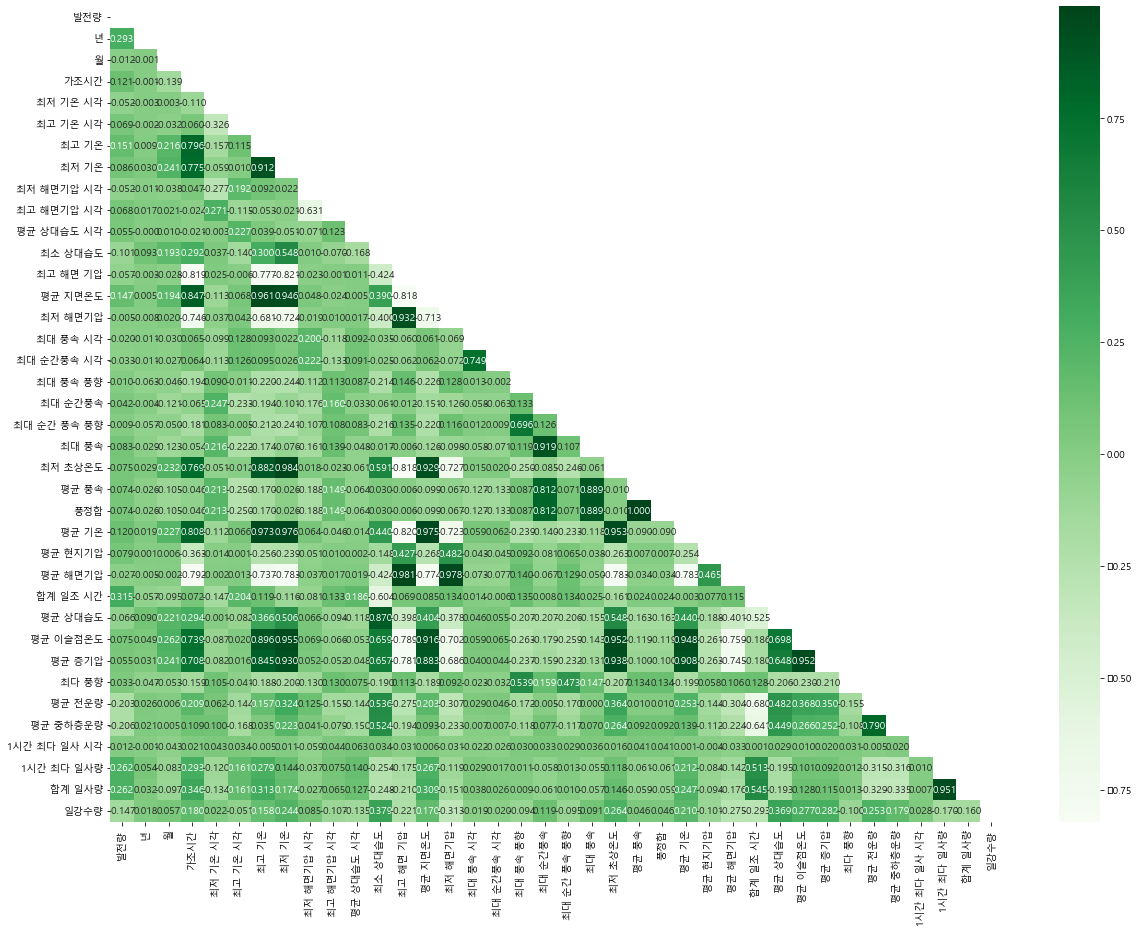

In [218]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
#plt.rcParams["figure.figsize"] = (20,15) # 그림 크기 조정
sns.heatmap(data = df.corr(), mask=mask, annot=True, fmt = '.3f', linewidths=0, cmap='Greens')
plt.show()

In [223]:
df.corr()['발전량'].sort_values(ascending=False)

발전량             1.000000
합계 일조 시간        0.315170
년               0.292726
1시간 최다 일사량      0.261887
합계 일사량          0.261835
최고 기온           0.151388
평균 지면온도         0.146527
가조시간            0.120838
평균 기온           0.119992
최저 기온           0.086495
최대 풍속           0.082922
평균 현지기압         0.079242
최저 초상온도         0.074717
평균 이슬점온도        0.074509
평균 풍속           0.074061
풍정합             0.074040
최고 기온 시각        0.069426
최고 해면기압 시각      0.067917
평균 증기압          0.055440
평균 상대습도 시각      0.054818
최대 순간풍속         0.042301
최다 풍향           0.033019
1시간 최다 일사 시각    0.011985
최대 풍속 풍향        0.010487
최대 순간 풍속 풍향     0.008642
최저 해면기압        -0.004775
월              -0.011963
최대 풍속 시각       -0.020035
평균 해면기압        -0.027171
최대 순간풍속 시각     -0.032786
최저 해면기압 시각     -0.052004
최저 기온 시각       -0.052302
최고 해면 기압       -0.057235
평균 상대습도        -0.065947
최소 상대습도        -0.101096
일강수량           -0.146917
평균 전운량         -0.202800
평균 중하층운량       -0.206123
Name: 발전량, dtype: float64

In [ ]:
'''
> 뚜렷한 양의 관계
합계 일조 시간        0.315170

> 약한 양의 관계
년               0.292726
1시간 최다 일사량      0.261887
합계 일사량          0.261835
최고 기온           0.151388
평균 지면온도         0.146527
가조시간            0.120838
평균 기온           0.119992
'''

In [ ]:
'''
> 약한 음의 관계
최소 상대습도        -0.101096
일강수량           -0.146917
평균 전운량         -0.202800
평균 중하층운량       -0.206123
'''

In [226]:
df['합계 일조 시간'].unique()

array([ 8.4       ,  2.        ,  3.5       ,  6.8       ,  4.9       ,
        5.7       ,  8.6       ,  1.6       ,  7.3       ,  7.6       ,
        7.        ,  0.7       ,  2.4       ,  4.4       ,  7.5       ,
        1.9       ,  4.5       ,  0.4       ,  1.8       ,  8.2       ,
        3.2       ,  8.7       ,  8.8       ,  0.8       ,  6.        ,
        5.9       ,  6.9       ,  8.        ,  6.3       ,  8.9       ,
        5.1       ,  9.        ,  6.7       ,  7.4       ,  7.1       ,
        7.7       ,  6.4       ,  5.6       ,  0.        ,  0.3       ,
        1.4       ,  4.        ,  0.2       ,  0.1       ,  1.2       ,
        1.3       ,  7.8       ,  5.8       ,  7.9       ,  4.7       ,
        6.5       ,  5.3       ,  4.2       ,  5.2       ,  7.2       ,
        4.6       ,  3.7       ,  3.9       ,  2.2       ,  0.5       ,
        2.7       ,  8.3       ,  6.6       ,  9.1       ,  8.5       ,
        9.2       ,  6.1       ,  9.3       ,  5.5       ,  2.5 

<AxesSubplot:xlabel='합계 일조 시간', ylabel='발전량'>

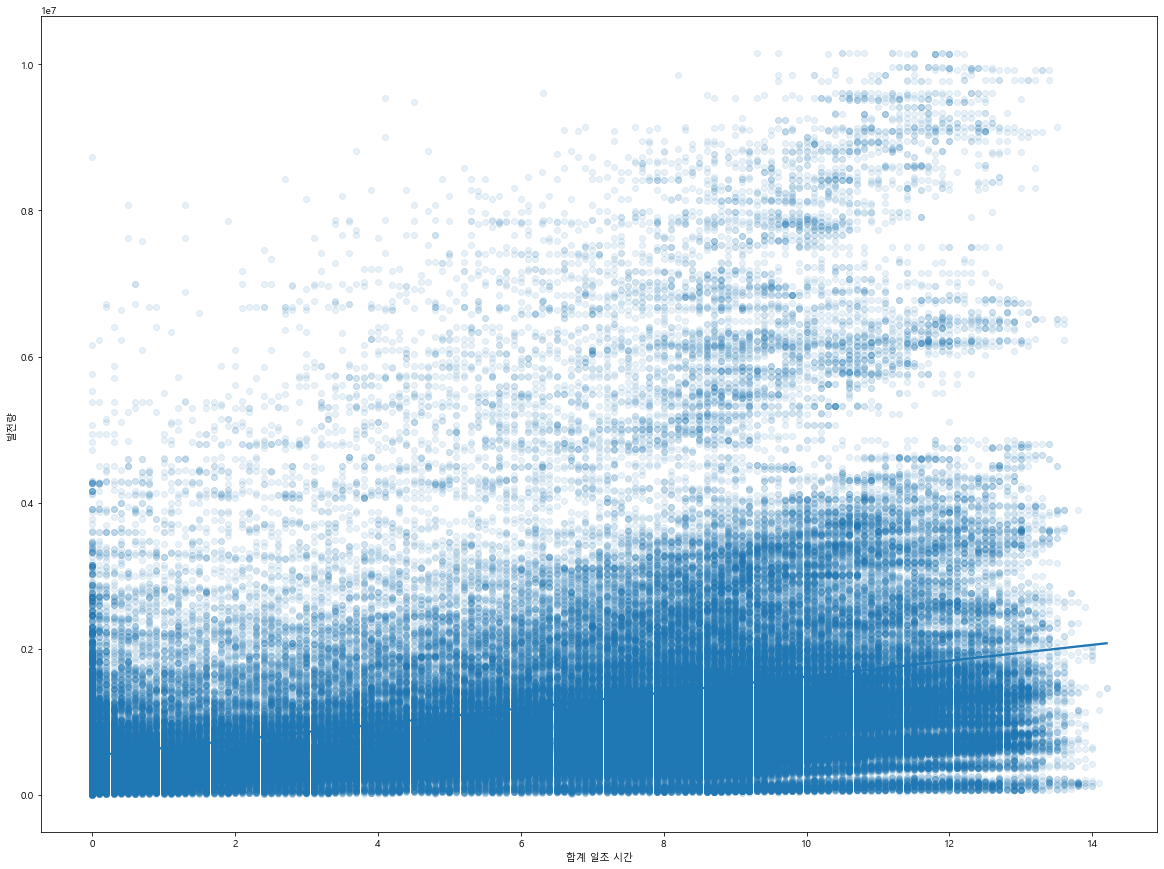

In [228]:
sns.regplot(x='합계 일조 시간', y='발전량', data=df, scatter_kws={'alpha':0.1})

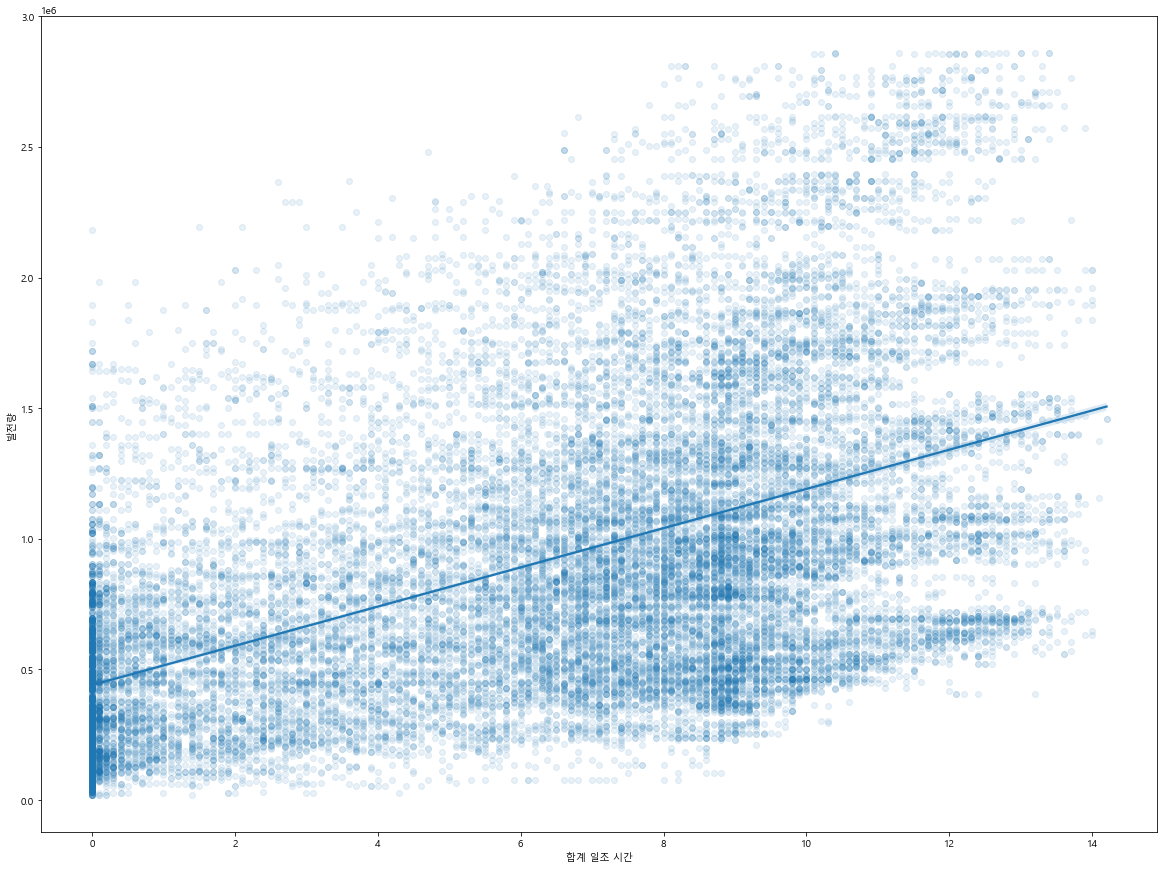

In [238]:
sns.regplot(x='합계 일조 시간', y='발전량', data=df[df['지역']== '강원도'], scatter_kws={'alpha':0.1})
plt.show()

,지역,일시,발전량,년,월,계절,가조시간,최저 기온 시각,최고 기온 시각,최고 기온,...,평균 상대습도,평균 이슬점온도,평균 증기압,최다 풍향,평균 전운량,평균 중하층운량,1시간 최다 일사 시각,1시간 최다 일사량,합계 일사량,일강수량
0,강원도,2017-01-01,154918.180,2017,1,봄,9.6,639.0,1224.0,9.8,...,50.0,-3.8,4.7,250.0,5.102725,2.932726,1193.841032,2.231196,14.259285,NaN
1,강원도,2017-01-01,154918.180,2017,1,봄,9.6,844.0,1529.0,5.5,...,85.0,-1.9,5.3,20.0,5.102725,2.932726,1193.841032,2.231196,14.259285,NaN
2,강원도,2017-01-01,154918.180,2017,1,봄,9.6,507.0,1352.0,5.8,...,87.1,-2.3,5.2,320.0,8.000000,8.000000,1200.000000,1.360000,6.370000,NaN
3,강원도,2017-01-01,154918.180,2017,1,봄,9.7,821.0,1445.0,5.9,...,63.6,-6.2,3.9,230.0,5.102725,2.932726,1193.841032,2.231196,14.259285,NaN
4,강원도,2017-01-01,154918.180,2017,1,봄,9.6,735.0,1443.0,6.1,...,83.8,-2.7,5.1,50.0,5.102725,2.932726,1193.841032,2.231196,14.259285,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25559,강원도,2021-12-31,1639502.093,2021,12,봄,9.6,721.0,1359.0,1.9,...,29.4,-18.6,1.4,230.0,0.800000,0.000000,1200.000000,1.960000,11.550000,NaN
25560,강원도,2021-12-31,1639502.093,2021,12,봄,9.6,642.0,1535.0,1.9,...,23.3,-20.6,1.2,290.0,0.400000,0.000000,1193.841032,2.231196,14.259285,NaN
25561,강원도,2021-12-31,1639502.093,2021,12,봄,9.6,2352.0,1502.0,-2.4,...,31.6,-20.1,1.2,290.0,0.000000,0.000000,1200.000000,1.890000,10.940000,NaN
25562,강원도,2021-12-31,1639502.093,2021,12,봄,9.7,2335.0,1512.0,-1.4,...,31.4,-20.5,1.2,270.0,0.100000,0.000000,1193.841032,2.231196,14.259285,NaN


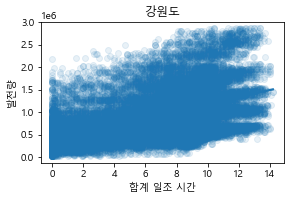

In [240]:
area_ls = list(df['지역'].unique())
for idx,area in enumerate(area_ls, 1):
    plt.subplot(5,4,idx)
    plt.title(area)
    df_tmp = df[df['지역'] == area]
    display(df_tmp)
    sns.regplot(x='합계 일조 시간', y='발전량', data=df_tmp, scatter_kws={'alpha':0.1})
    break
plt.show()

In [235]:
df['지역'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주시', '대구시', '대전시', '부산시', '서울시',
       '세종시', '울산시', '인천시', '전라남도', '전라북도', '제주도', '충청남도', '충청북도'],
      dtype=object)

In [241]:
df.isnull().sum()

지역                   0
일시                   0
발전량                  0
년                    0
월                    0
계절                   0
가조시간             10956
최저 기온 시각         10956
최고 기온 시각         10956
최고 기온            10956
최저 기온            10956
최저 해면기압 시각       10956
최고 해면기압 시각       10956
평균 상대습도 시각       10956
최소 상대습도          10956
최고 해면 기압         10956
평균 지면온도          10956
최저 해면기압          10956
최대 풍속 시각         10956
최대 순간풍속 시각       10956
최대 풍속 풍향         10956
최대 순간풍속          10956
최대 순간 풍속 풍향      10956
최대 풍속            10956
최저 초상온도          10956
평균 풍속            10956
풍정합              10956
평균 기온            10956
평균 현지기압          10956
평균 해면기압          10956
합계 일조 시간         10956
평균 상대습도          10956
평균 이슬점온도         10956
평균 증기압           10956
최다 풍향            10956
평균 전운량           10956
평균 중하층운량         10956
1시간 최다 일사 시각     10956
1시간 최다 일사량       10956
합계 일사량           10956
일강수량            120294
dtype: int64

In [ ]:
df.groupby(['지역', '일시'])